# Predict #
To be re-inserted into main Jupyter Notebook after.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# For neural networks.
import keras as kr
# For data frames.
import pandas as pd
# For numerical arrays.
import numpy as np
# For preprocessing data.
import sklearn.preprocessing as pre
# For splitting data sets.
import sklearn.model_selection as mod
# For whitening.
import sklearn.decomposition as dec
# to write to csv file
import csv

Using TensorFlow backend.


In [2]:
# Import sklearn for comparison too
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

In [3]:
# Load the dataset into a dataframe
data = pd.DataFrame(data = load_boston().data, columns= load_boston().feature_names)
# Add the house price
data["MEDV"] = load_boston().target
# Quick check that all is ok
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


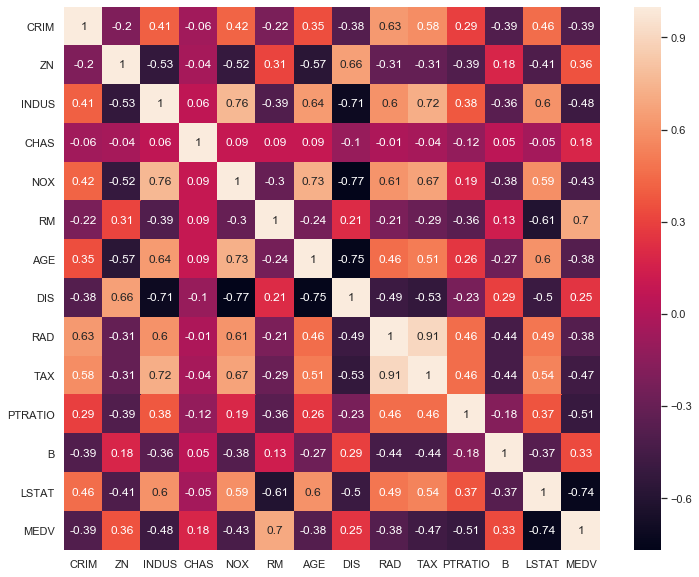

In [4]:
sns.set(rc={'figure.figsize':(12,10)})
correlation_matrix = data.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

In [5]:
correlation_matrix["MEDV"]

CRIM      -0.39
ZN         0.36
INDUS     -0.48
CHAS       0.18
NOX       -0.43
RM         0.70
AGE       -0.38
DIS        0.25
RAD       -0.38
TAX       -0.47
PTRATIO   -0.51
B          0.33
LSTAT     -0.74
MEDV       1.00
Name: MEDV, dtype: float64

In [6]:
cm = correlation_matrix.transform(func= lambda x: abs(x))["MEDV"].sort_values(ascending=False)
cm = cm.drop("MEDV",axis=0)
cm

LSTAT      0.74
RM         0.70
PTRATIO    0.51
INDUS      0.48
TAX        0.47
NOX        0.43
CRIM       0.39
RAD        0.38
AGE        0.38
ZN         0.36
B          0.33
DIS        0.25
CHAS       0.18
Name: MEDV, dtype: float64

In [7]:
# Putting all possible parameters in a list in order of correlation
params = []
for i in range(0, len(cm)):
    params.append(cm.index[i])

In [8]:
y = data['MEDV'] # outputs

def getInputs(noPar):
    # Split the dataset into what we are using
    return data[params[:noPar]] # inputs

In [9]:
def scaleDS(inputs):
    # Adding a scaler
    scaler = pre.StandardScaler()
    scaler.fit(inputs)
    return scaler.transform(inputs)

In [10]:
def whiten(noAttrib, inputs):
    # Pre-component Analysis
    pca = dec.PCA(n_components=noAttrib, whiten=True)
    pca.fit(inputs)
    # Whiten the dataset
    inputs_train_white = pd.DataFrame(pca.transform(inputs), columns=inputs.columns)
    return inputs_train_white

In [11]:
def splitDS(inputs):
    global x_train, x_test, y_train, y_test
    # Split the dataset into training and testing
    x_train, x_test, y_train, y_test = mod.train_test_split(inputs, y, test_size=testSize)

In [12]:
def createModel(actType, optType):
    global noParams, noEpoch, batchSize
    # Create our model
    m = kr.models.Sequential()
    m.add(kr.layers.Dense(20, input_dim=noParams, activation = actType))
    m.add(kr.layers.Dense(1, activation="linear"))
    m.compile(loss = "mean_squared_error", optimizer =optType)
    return m

In [13]:
def doModel(model, epo, bs):
    global x_train, x_test, y_tran, y_test, batchSize
    # Train the network
    model.fit(x_train, y_train, epochs=epo, batch_size=bs)
    # Calculate the loss function (Mean squared error in our case)
    return model.evaluate(x_test, y_test)

In [14]:
# Headings for the data
results= []

In [83]:
# Parameterise everything

# Do you want to create and test all the models? 
# If yes, set the following to true, if no, leave at false and data from previous run will be read into dataframe
yesCreateModels = True

# No of variables to include in predictions
noParams = 4 

# Test / Train Split
testSize = 0.3

# All the activations
acts = ["relu", "tanh", "sigmoid", "exponential", "elu", "linear"]
#act = acts[5]


# model trial settings
# Optimisers
opts= ["sgd", "adam", "nadam"]
opt = opts[2]
noEpoch= 100
batchSize = 10

# Whether the data should be scaled or not
pre_process = "whitened" # Pre-processing: raw, scaled or whitened 

if yesCreateModels == True:
    results= []
    # Check for increasing no of attributes and all activations
    for act in acts:
        for noParams in range(1,13):
            print("Starting", act, "Parameter no:",noParams)
            # Create your inputs
            x = getInputs(noParams)
            # Scale if it is called for
            if pre_process  == "scaled":
                x_scaled = scaleDS(x)
            elif pre_process == "raw":
                x_scaled = x
            elif pre_process == "whitened":
                x_scaled = whiten(noParams, x)
            # Split into training and testing data
            splitDS(x_scaled)
            # Create the model based on the parameters supplied
            m = createModel(act, opt)
            # Append the settings and final loss results after fitting and evaluating the model to the results file
            results.append([noParams, pre_process, testSize, act, opt, noEpoch, batchSize, doModel(m, noEpoch, batchSize)])

Starting relu Parameter no: 1
Epoch 1/100
354/354 [==============================] - 0s 1ms/step - loss: 546.7299
Epoch 2/100
354/354 [==============================] - 0s 135us/step - loss: 522.5179
Epoch 3/100
354/354 [==============================] - 0s 138us/step - loss: 488.8901
Epoch 4/100
354/354 [==============================] - 0s 163us/step - loss: 442.6621
Epoch 5/100
354/354 [==============================] - 0s 132us/step - loss: 383.9418
Epoch 6/100
354/354 [==============================] - 0s 124us/step - loss: 317.0862
Epoch 7/100
354/354 [==============================] - 0s 149us/step - loss: 248.5993
Epoch 8/100
354/354 [==============================] - 0s 144us/step - loss: 185.9384
Epoch 9/100
354/354 [==============================] - 0s 169us/step - loss: 131.4278
Epoch 10/100
354/354 [==============================] - 0s 166us/step - loss: 89.1958
Epoch 11/100
354/354 [==============================] - 0s 160us/step - loss: 60.6808
Epoch 12/100
354/354 [====

354/354 [==============================] - 0s 137us/step - loss: 26.3229
Epoch 96/100
354/354 [==============================] - 0s 127us/step - loss: 26.2935
Epoch 97/100
354/354 [==============================] - 0s 118us/step - loss: 26.2553
Epoch 98/100
354/354 [==============================] - 0s 126us/step - loss: 26.2705
Epoch 99/100
354/354 [==============================] - 0s 116us/step - loss: 26.2350
Epoch 100/100
152/152 [==============================] - 0s 217us/step
Starting relu Parameter no: 2
Epoch 1/100
354/354 [==============================] - 0s 1ms/step - loss: 554.5169
Epoch 2/100
354/354 [==============================] - 0s 130us/step - loss: 524.2920
Epoch 3/100
354/354 [==============================] - 0s 173us/step - loss: 486.8930
Epoch 4/100
354/354 [==============================] - 0s 141us/step - loss: 440.8263
Epoch 5/100
354/354 [==============================] - 0s 124us/step - loss: 386.4178
Epoch 6/100
354/354 [==============================] -

354/354 [==============================] - 0s 206us/step - loss: 18.3210
Epoch 90/100
354/354 [==============================] - 0s 154us/step - loss: 18.2879
Epoch 91/100
354/354 [==============================] - 0s 197us/step - loss: 18.2961
Epoch 92/100
354/354 [==============================] - 0s 211us/step - loss: 18.2679
Epoch 93/100
354/354 [==============================] - 0s 132us/step - loss: 18.2347
Epoch 94/100
354/354 [==============================] - 0s 141us/step - loss: 18.2459
Epoch 95/100
354/354 [==============================] - 0s 146us/step - loss: 18.2749
Epoch 96/100
354/354 [==============================] - 0s 174us/step - loss: 18.2886
Epoch 97/100
354/354 [==============================] - 0s 172us/step - loss: 18.2417
Epoch 98/100
354/354 [==============================] - 0s 158us/step - loss: 18.1675
Epoch 99/100
354/354 [==============================] - 0s 153us/step - loss: 18.1440
Epoch 100/100
152/152 [==============================] - 0s 315us/s

354/354 [==============================] - 0s 135us/step - loss: 18.5238
Epoch 84/100
354/354 [==============================] - 0s 194us/step - loss: 18.4999
Epoch 85/100
354/354 [==============================] - 0s 124us/step - loss: 18.4956
Epoch 86/100
354/354 [==============================] - 0s 113us/step - loss: 18.4507
Epoch 87/100
354/354 [==============================] - 0s 141us/step - loss: 18.4445
Epoch 88/100
354/354 [==============================] - 0s 121us/step - loss: 18.3946
Epoch 89/100
354/354 [==============================] - 0s 110us/step - loss: 18.4039
Epoch 90/100
354/354 [==============================] - 0s 124us/step - loss: 18.3336
Epoch 91/100
354/354 [==============================] - 0s 127us/step - loss: 18.3066
Epoch 92/100
354/354 [==============================] - 0s 130us/step - loss: 18.2638
Epoch 93/100
354/354 [==============================] - 0s 130us/step - loss: 18.2406
Epoch 94/100
354/354 [==============================] - 0s 137us/st

354/354 [==============================] - 0s 124us/step - loss: 13.9775
Epoch 78/100
354/354 [==============================] - 0s 121us/step - loss: 13.8589
Epoch 79/100
354/354 [==============================] - 0s 121us/step - loss: 13.8485
Epoch 80/100
354/354 [==============================] - 0s 124us/step - loss: 13.8026
Epoch 81/100
354/354 [==============================] - 0s 121us/step - loss: 13.7652
Epoch 82/100
354/354 [==============================] - 0s 138us/step - loss: 13.6859
Epoch 83/100
354/354 [==============================] - 0s 117us/step - loss: 13.6278
Epoch 84/100
354/354 [==============================] - 0s 118us/step - loss: 13.5606
Epoch 85/100
354/354 [==============================] - 0s 124us/step - loss: 13.4892
Epoch 86/100
354/354 [==============================] - 0s 127us/step - loss: 13.4642
Epoch 87/100
354/354 [==============================] - 0s 113us/step - loss: 13.4098
Epoch 88/100
354/354 [==============================] - 0s 127us/st

354/354 [==============================] - 0s 127us/step - loss: 14.8576
Epoch 72/100
354/354 [==============================] - 0s 130us/step - loss: 14.7641
Epoch 73/100
354/354 [==============================] - 0s 124us/step - loss: 14.7731
Epoch 74/100
354/354 [==============================] - 0s 118us/step - loss: 14.6938
Epoch 75/100
354/354 [==============================] - 0s 144us/step - loss: 14.6428
Epoch 76/100
354/354 [==============================] - 0s 155us/step - loss: 14.6334
Epoch 77/100
354/354 [==============================] - 0s 124us/step - loss: 14.5537
Epoch 78/100
354/354 [==============================] - 0s 116us/step - loss: 14.5186
Epoch 79/100
354/354 [==============================] - 0s 125us/step - loss: 14.4034
Epoch 80/100
354/354 [==============================] - 0s 121us/step - loss: 14.4344
Epoch 81/100
354/354 [==============================] - 0s 133us/step - loss: 14.3583
Epoch 82/100
354/354 [==============================] - 0s 135us/st

354/354 [==============================] - 0s 134us/step - loss: 13.0274
Epoch 66/100
354/354 [==============================] - 0s 124us/step - loss: 12.9750
Epoch 67/100
354/354 [==============================] - 0s 128us/step - loss: 12.8869
Epoch 68/100
354/354 [==============================] - 0s 117us/step - loss: 12.8397
Epoch 69/100
354/354 [==============================] - 0s 119us/step - loss: 12.7311
Epoch 70/100
354/354 [==============================] - 0s 120us/step - loss: 12.8100
Epoch 71/100
354/354 [==============================] - 0s 112us/step - loss: 12.6782
Epoch 72/100
354/354 [==============================] - 0s 133us/step - loss: 12.6449
Epoch 73/100
354/354 [==============================] - 0s 116us/step - loss: 12.5210
Epoch 74/100
354/354 [==============================] - 0s 121us/step - loss: 12.5092
Epoch 75/100
354/354 [==============================] - 0s 116us/step - loss: 12.3856
Epoch 76/100
354/354 [==============================] - 0s 138us/st

354/354 [==============================] - 0s 108us/step - loss: 12.5412
Epoch 60/100
354/354 [==============================] - 0s 121us/step - loss: 12.4152
Epoch 61/100
354/354 [==============================] - 0s 105us/step - loss: 12.4134
Epoch 62/100
354/354 [==============================] - 0s 114us/step - loss: 12.3416
Epoch 63/100
354/354 [==============================] - 0s 110us/step - loss: 12.3268
Epoch 64/100
354/354 [==============================] - 0s 109us/step - loss: 12.2362
Epoch 65/100
354/354 [==============================] - 0s 121us/step - loss: 12.1710
Epoch 66/100
354/354 [==============================] - 0s 102us/step - loss: 12.0970
Epoch 67/100
354/354 [==============================] - 0s 102us/step - loss: 12.0432
Epoch 68/100
354/354 [==============================] - 0s 114us/step - loss: 11.9910
Epoch 69/100
354/354 [==============================] - 0s 101us/step - loss: 11.9349
Epoch 70/100
354/354 [==============================] - 0s 105us/st

354/354 [==============================] - 0s 122us/step - loss: 15.5749
Epoch 54/100
354/354 [==============================] - 0s 119us/step - loss: 15.4802
Epoch 55/100
354/354 [==============================] - 0s 105us/step - loss: 15.3213
Epoch 56/100
354/354 [==============================] - 0s 108us/step - loss: 15.2218
Epoch 57/100
354/354 [==============================] - 0s 104us/step - loss: 15.1185
Epoch 58/100
354/354 [==============================] - 0s 108us/step - loss: 14.9457
Epoch 59/100
354/354 [==============================] - 0s 104us/step - loss: 14.8771
Epoch 60/100
354/354 [==============================] - 0s 101us/step - loss: 14.7573
Epoch 61/100
354/354 [==============================] - 0s 128us/step - loss: 14.6040
Epoch 62/100
354/354 [==============================] - 0s 104us/step - loss: 14.4717
Epoch 63/100
354/354 [==============================] - 0s 110us/step - loss: 14.3570
Epoch 64/100
354/354 [==============================] - 0s 110us/st

354/354 [==============================] - 0s 119us/step - loss: 12.4064
Epoch 48/100
354/354 [==============================] - 0s 121us/step - loss: 12.3329
Epoch 49/100
354/354 [==============================] - 0s 108us/step - loss: 12.2416
Epoch 50/100
354/354 [==============================] - 0s 105us/step - loss: 12.1769
Epoch 51/100
354/354 [==============================] - 0s 122us/step - loss: 12.1244
Epoch 52/100
354/354 [==============================] - 0s 98us/step - loss: 12.0052
Epoch 53/100
354/354 [==============================] - 0s 113us/step - loss: 11.9878
Epoch 54/100
354/354 [==============================] - 0s 93us/step - loss: 11.8896
Epoch 55/100
354/354 [==============================] - 0s 110us/step - loss: 11.8364
Epoch 56/100
354/354 [==============================] - 0s 98us/step - loss: 11.7260
Epoch 57/100
354/354 [==============================] - 0s 99us/step - loss: 11.6526
Epoch 58/100
354/354 [==============================] - 0s 103us/step -

354/354 [==============================] - 0s 116us/step - loss: 16.2295
Epoch 42/100
354/354 [==============================] - 0s 113us/step - loss: 16.1476
Epoch 43/100
354/354 [==============================] - 0s 101us/step - loss: 15.9005
Epoch 44/100
354/354 [==============================] - 0s 113us/step - loss: 15.8006
Epoch 45/100
354/354 [==============================] - 0s 108us/step - loss: 15.7023
Epoch 46/100
354/354 [==============================] - 0s 102us/step - loss: 15.5631
Epoch 47/100
354/354 [==============================] - 0s 106us/step - loss: 15.4187
Epoch 48/100
354/354 [==============================] - 0s 115us/step - loss: 15.2910
Epoch 49/100
354/354 [==============================] - 0s 108us/step - loss: 15.1454
Epoch 50/100
354/354 [==============================] - 0s 119us/step - loss: 15.0116
Epoch 51/100
354/354 [==============================] - 0s 112us/step - loss: 14.8961
Epoch 52/100
354/354 [==============================] - 0s 101us/st

354/354 [==============================] - 0s 123us/step - loss: 16.4320
Epoch 36/100
354/354 [==============================] - 0s 124us/step - loss: 16.1802
Epoch 37/100
354/354 [==============================] - 0s 113us/step - loss: 16.0000
Epoch 38/100
354/354 [==============================] - 0s 106us/step - loss: 15.7591
Epoch 39/100
354/354 [==============================] - 0s 110us/step - loss: 15.6480
Epoch 40/100
354/354 [==============================] - 0s 108us/step - loss: 15.4758
Epoch 41/100
354/354 [==============================] - 0s 105us/step - loss: 15.2295
Epoch 42/100
354/354 [==============================] - 0s 104us/step - loss: 15.0951
Epoch 43/100
354/354 [==============================] - 0s 116us/step - loss: 14.9065
Epoch 44/100
354/354 [==============================] - 0s 112us/step - loss: 14.7399
Epoch 45/100
354/354 [==============================] - 0s 130us/step - loss: 14.6320
Epoch 46/100
354/354 [==============================] - 0s 100us/st

354/354 [==============================] - 0s 75us/step - loss: 14.1978
Epoch 30/100
354/354 [==============================] - 0s 107us/step - loss: 14.0399
Epoch 31/100
354/354 [==============================] - 0s 102us/step - loss: 13.8258
Epoch 32/100
354/354 [==============================] - 0s 125us/step - loss: 13.6423
Epoch 33/100
354/354 [==============================] - 0s 118us/step - loss: 13.4875
Epoch 34/100
354/354 [==============================] - 0s 111us/step - loss: 13.3619
Epoch 35/100
354/354 [==============================] - 0s 116us/step - loss: 13.1795
Epoch 36/100
354/354 [==============================] - 0s 119us/step - loss: 13.0428
Epoch 37/100
354/354 [==============================] - 0s 111us/step - loss: 12.8979
Epoch 38/100
354/354 [==============================] - 0s 117us/step - loss: 12.7523
Epoch 39/100
354/354 [==============================] - 0s 90us/step - loss: 12.6610
Epoch 40/100
354/354 [==============================] - 0s 134us/step

354/354 [==============================] - 0s 138us/step - loss: 51.9091
Epoch 24/100
354/354 [==============================] - 0s 161us/step - loss: 51.4924
Epoch 25/100
354/354 [==============================] - 0s 141us/step - loss: 51.1458
Epoch 26/100
354/354 [==============================] - 0s 121us/step - loss: 50.7994
Epoch 27/100
354/354 [==============================] - 0s 118us/step - loss: 50.4953
Epoch 28/100
354/354 [==============================] - 0s 115us/step - loss: 50.1423
Epoch 29/100
354/354 [==============================] - 0s 119us/step - loss: 49.8434
Epoch 30/100
354/354 [==============================] - 0s 119us/step - loss: 49.4673
Epoch 31/100
354/354 [==============================] - 0s 139us/step - loss: 49.1674
Epoch 32/100
354/354 [==============================] - 0s 110us/step - loss: 48.8156
Epoch 33/100
354/354 [==============================] - 0s 131us/step - loss: 48.4122
Epoch 34/100
354/354 [==============================] - 0s 113us/st

354/354 [==============================] - 0s 140us/step - loss: 56.4055
Epoch 18/100
354/354 [==============================] - 0s 122us/step - loss: 53.4859
Epoch 19/100
354/354 [==============================] - 0s 108us/step - loss: 51.6001
Epoch 20/100
354/354 [==============================] - 0s 116us/step - loss: 50.1445
Epoch 21/100
354/354 [==============================] - 0s 113us/step - loss: 49.2058
Epoch 22/100
354/354 [==============================] - 0s 118us/step - loss: 48.4858
Epoch 23/100
354/354 [==============================] - 0s 113us/step - loss: 47.9373
Epoch 24/100
354/354 [==============================] - 0s 122us/step - loss: 47.5331
Epoch 25/100
354/354 [==============================] - 0s 102us/step - loss: 47.1814
Epoch 26/100
354/354 [==============================] - 0s 113us/step - loss: 46.7496
Epoch 27/100
354/354 [==============================] - 0s 113us/step - loss: 46.3892
Epoch 28/100
354/354 [==============================] - 0s 110us/st

354/354 [==============================] - 0s 110us/step - loss: 128.6285
Epoch 12/100
354/354 [==============================] - 0s 104us/step - loss: 103.8689
Epoch 13/100
354/354 [==============================] - 0s 99us/step - loss: 85.7022
Epoch 14/100
354/354 [==============================] - 0s 107us/step - loss: 72.5044
Epoch 15/100
354/354 [==============================] - 0s 96us/step - loss: 63.0723
Epoch 16/100
354/354 [==============================] - 0s 107us/step - loss: 56.3335
Epoch 17/100
354/354 [==============================] - 0s 107us/step - loss: 51.6290
Epoch 18/100
354/354 [==============================] - 0s 107us/step - loss: 48.4940
Epoch 19/100
354/354 [==============================] - 0s 118us/step - loss: 46.2361
Epoch 20/100
354/354 [==============================] - 0s 97us/step - loss: 44.7200
Epoch 21/100
354/354 [==============================] - 0s 107us/step - loss: 43.6278
Epoch 22/100
354/354 [==============================] - 0s 113us/ste

354/354 [==============================] - 0s 113us/step - loss: 428.8644
Epoch 6/100
354/354 [==============================] - 0s 116us/step - loss: 372.8796
Epoch 7/100
354/354 [==============================] - 0s 104us/step - loss: 316.4481
Epoch 8/100
354/354 [==============================] - 0s 96us/step - loss: 261.9340
Epoch 9/100
354/354 [==============================] - 0s 105us/step - loss: 213.2501
Epoch 10/100
354/354 [==============================] - 0s 108us/step - loss: 171.8967
Epoch 11/100
354/354 [==============================] - 0s 110us/step - loss: 138.8956
Epoch 12/100
354/354 [==============================] - 0s 105us/step - loss: 113.1356
Epoch 13/100
354/354 [==============================] - 0s 113us/step - loss: 93.8772
Epoch 14/100
354/354 [==============================] - 0s 107us/step - loss: 79.9414
Epoch 15/100
354/354 [==============================] - 0s 113us/step - loss: 69.6449
Epoch 16/100
354/354 [==============================] - 0s 105us

152/152 [==============================] - 0s 231us/step
Starting tanh Parameter no: 5
Epoch 1/100
354/354 [==============================] - 0s 841us/step - loss: 589.3404
Epoch 2/100
354/354 [==============================] - 0s 96us/step - loss: 569.4408
Epoch 3/100
354/354 [==============================] - 0s 108us/step - loss: 542.9503
Epoch 4/100
354/354 [==============================] - 0s 103us/step - loss: 506.1877
Epoch 5/100
354/354 [==============================] - 0s 96us/step - loss: 459.7869
Epoch 6/100
354/354 [==============================] - 0s 102us/step - loss: 404.3346
Epoch 7/100
354/354 [==============================] - 0s 116us/step - loss: 345.3865
Epoch 8/100
354/354 [==============================] - 0s 123us/step - loss: 286.8292
Epoch 9/100
354/354 [==============================] - 0s 107us/step - loss: 233.7336
Epoch 10/100
354/354 [==============================] - 0s 107us/step - loss: 188.6798
Epoch 11/100
354/354 [==============================] 

354/354 [==============================] - 0s 124us/step - loss: 20.7883
Epoch 95/100
354/354 [==============================] - 0s 125us/step - loss: 20.5773
Epoch 96/100
354/354 [==============================] - 0s 111us/step - loss: 20.3098
Epoch 97/100
354/354 [==============================] - 0s 110us/step - loss: 20.1933
Epoch 98/100
354/354 [==============================] - 0s 118us/step - loss: 20.0245
Epoch 99/100
354/354 [==============================] - 0s 106us/step - loss: 19.8316
Epoch 100/100
152/152 [==============================] - 0s 263us/step
Starting tanh Parameter no: 6
Epoch 1/100
354/354 [==============================] - 0s 907us/step - loss: 580.9792
Epoch 2/100
354/354 [==============================] - 0s 101us/step - loss: 557.5699
Epoch 3/100
354/354 [==============================] - 0s 107us/step - loss: 528.9778
Epoch 4/100
354/354 [==============================] - 0s 99us/step - loss: 492.0878
Epoch 5/100
354/354 [==============================] 

354/354 [==============================] - 0s 107us/step - loss: 17.2434
Epoch 89/100
354/354 [==============================] - 0s 116us/step - loss: 17.1422
Epoch 90/100
354/354 [==============================] - 0s 105us/step - loss: 16.9792
Epoch 91/100
354/354 [==============================] - 0s 109us/step - loss: 16.8214
Epoch 92/100
354/354 [==============================] - 0s 107us/step - loss: 16.6616
Epoch 93/100
354/354 [==============================] - 0s 123us/step - loss: 16.5767
Epoch 94/100
354/354 [==============================] - 0s 97us/step - loss: 16.4047
Epoch 95/100
354/354 [==============================] - 0s 115us/step - loss: 16.4356
Epoch 96/100
354/354 [==============================] - 0s 123us/step - loss: 16.1714
Epoch 97/100
354/354 [==============================] - 0s 119us/step - loss: 16.0859
Epoch 98/100
354/354 [==============================] - 0s 105us/step - loss: 16.0263
Epoch 99/100
354/354 [==============================] - 0s 113us/ste

354/354 [==============================] - 0s 108us/step - loss: 21.6536
Epoch 83/100
354/354 [==============================] - 0s 122us/step - loss: 21.4485
Epoch 84/100
354/354 [==============================] - 0s 119us/step - loss: 21.2550
Epoch 85/100
354/354 [==============================] - 0s 108us/step - loss: 21.0163
Epoch 86/100
354/354 [==============================] - 0s 114us/step - loss: 20.8552
Epoch 87/100
354/354 [==============================] - 0s 113us/step - loss: 20.6012
Epoch 88/100
354/354 [==============================] - 0s 111us/step - loss: 20.4583
Epoch 89/100
354/354 [==============================] - 0s 110us/step - loss: 20.2510
Epoch 90/100
354/354 [==============================] - 0s 118us/step - loss: 20.0514
Epoch 91/100
354/354 [==============================] - 0s 82us/step - loss: 19.8450
Epoch 92/100
354/354 [==============================] - 0s 116us/step - loss: 19.6982
Epoch 93/100
354/354 [==============================] - 0s 114us/ste

354/354 [==============================] - 0s 108us/step - loss: 20.8410
Epoch 77/100
354/354 [==============================] - 0s 113us/step - loss: 20.6121
Epoch 78/100
354/354 [==============================] - 0s 110us/step - loss: 20.4086
Epoch 79/100
354/354 [==============================] - 0s 115us/step - loss: 20.1788
Epoch 80/100
354/354 [==============================] - 0s 105us/step - loss: 19.9805
Epoch 81/100
354/354 [==============================] - 0s 105us/step - loss: 19.8116
Epoch 82/100
354/354 [==============================] - 0s 114us/step - loss: 19.6860
Epoch 83/100
354/354 [==============================] - 0s 102us/step - loss: 19.3177
Epoch 84/100
354/354 [==============================] - 0s 105us/step - loss: 19.1957
Epoch 85/100
354/354 [==============================] - 0s 108us/step - loss: 18.9940
Epoch 86/100
354/354 [==============================] - 0s 99us/step - loss: 18.8404
Epoch 87/100
354/354 [==============================] - 0s 119us/ste

354/354 [==============================] - 0s 108us/step - loss: 18.3038
Epoch 71/100
354/354 [==============================] - 0s 116us/step - loss: 18.0286
Epoch 72/100
354/354 [==============================] - 0s 96us/step - loss: 17.8462
Epoch 73/100
354/354 [==============================] - 0s 108us/step - loss: 17.5177
Epoch 74/100
354/354 [==============================] - 0s 116us/step - loss: 17.2633
Epoch 75/100
354/354 [==============================] - 0s 133us/step - loss: 17.0505
Epoch 76/100
354/354 [==============================] - 0s 127us/step - loss: 16.8228
Epoch 77/100
354/354 [==============================] - 0s 133us/step - loss: 16.4875
Epoch 78/100
354/354 [==============================] - 0s 119us/step - loss: 16.2518
Epoch 79/100
354/354 [==============================] - 0s 136us/step - loss: 15.9956
Epoch 80/100
354/354 [==============================] - 0s 126us/step - loss: 15.7079
Epoch 81/100
354/354 [==============================] - 0s 130us/ste

354/354 [==============================] - 0s 103us/step - loss: 21.4346
Epoch 65/100
354/354 [==============================] - 0s 110us/step - loss: 21.0043
Epoch 66/100
354/354 [==============================] - 0s 100us/step - loss: 20.7373
Epoch 67/100
354/354 [==============================] - 0s 91us/step - loss: 20.3716
Epoch 68/100
354/354 [==============================] - 0s 120us/step - loss: 20.0851
Epoch 69/100
354/354 [==============================] - 0s 107us/step - loss: 19.8047
Epoch 70/100
354/354 [==============================] - 0s 95us/step - loss: 19.4823
Epoch 71/100
354/354 [==============================] - 0s 118us/step - loss: 19.1862
Epoch 72/100
354/354 [==============================] - 0s 105us/step - loss: 18.8674
Epoch 73/100
354/354 [==============================] - 0s 110us/step - loss: 18.6202
Epoch 74/100
354/354 [==============================] - 0s 122us/step - loss: 18.4235
Epoch 75/100
354/354 [==============================] - 0s 107us/step

354/354 [==============================] - 0s 113us/step - loss: 25.0521
Epoch 59/100
354/354 [==============================] - 0s 108us/step - loss: 24.6305
Epoch 60/100
354/354 [==============================] - 0s 111us/step - loss: 24.1259
Epoch 61/100
354/354 [==============================] - 0s 109us/step - loss: 23.6632
Epoch 62/100
354/354 [==============================] - 0s 117us/step - loss: 23.2879
Epoch 63/100
354/354 [==============================] - 0s 99us/step - loss: 22.9210
Epoch 64/100
354/354 [==============================] - 0s 102us/step - loss: 22.5536
Epoch 65/100
354/354 [==============================] - 0s 99us/step - loss: 22.2390
Epoch 66/100
354/354 [==============================] - 0s 99us/step - loss: 21.9385
Epoch 67/100
354/354 [==============================] - 0s 112us/step - loss: 21.5670
Epoch 68/100
354/354 [==============================] - 0s 113us/step - loss: 21.2988
Epoch 69/100
354/354 [==============================] - 0s 119us/step 

354/354 [==============================] - 0s 119us/step - loss: 26.2778
Epoch 53/100
354/354 [==============================] - 0s 116us/step - loss: 25.7489
Epoch 54/100
354/354 [==============================] - 0s 107us/step - loss: 25.2858
Epoch 55/100
354/354 [==============================] - 0s 113us/step - loss: 24.8678
Epoch 56/100
354/354 [==============================] - 0s 113us/step - loss: 24.3439
Epoch 57/100
354/354 [==============================] - 0s 110us/step - loss: 23.9013
Epoch 58/100
354/354 [==============================] - 0s 124us/step - loss: 23.3838
Epoch 59/100
354/354 [==============================] - 0s 113us/step - loss: 23.0916
Epoch 60/100
354/354 [==============================] - 0s 110us/step - loss: 22.5771
Epoch 61/100
354/354 [==============================] - 0s 124us/step - loss: 22.1876
Epoch 62/100
354/354 [==============================] - 0s 116us/step - loss: 21.8073
Epoch 63/100
354/354 [==============================] - 0s 125us/st

354/354 [==============================] - 0s 106us/step - loss: 43.7698
Epoch 47/100
354/354 [==============================] - 0s 121us/step - loss: 43.5806
Epoch 48/100
354/354 [==============================] - 0s 107us/step - loss: 43.4304
Epoch 49/100
354/354 [==============================] - 0s 107us/step - loss: 43.2458
Epoch 50/100
354/354 [==============================] - 0s 108us/step - loss: 43.0465
Epoch 51/100
354/354 [==============================] - 0s 105us/step - loss: 42.9043
Epoch 52/100
354/354 [==============================] - 0s 111us/step - loss: 42.7022
Epoch 53/100
354/354 [==============================] - 0s 108us/step - loss: 42.5102
Epoch 54/100
354/354 [==============================] - 0s 110us/step - loss: 42.3220
Epoch 55/100
354/354 [==============================] - 0s 105us/step - loss: 42.1585
Epoch 56/100
354/354 [==============================] - 0s 113us/step - loss: 41.9542
Epoch 57/100
354/354 [==============================] - 0s 95us/ste

354/354 [==============================] - 0s 102us/step - loss: 40.8858
Epoch 41/100
354/354 [==============================] - 0s 121us/step - loss: 40.5885
Epoch 42/100
354/354 [==============================] - 0s 105us/step - loss: 40.3103
Epoch 43/100
354/354 [==============================] - 0s 122us/step - loss: 40.0227
Epoch 44/100
354/354 [==============================] - 0s 99us/step - loss: 39.7679
Epoch 45/100
354/354 [==============================] - 0s 99us/step - loss: 39.4871
Epoch 46/100
354/354 [==============================] - 0s 116us/step - loss: 39.2124
Epoch 47/100
354/354 [==============================] - 0s 113us/step - loss: 38.9560
Epoch 48/100
354/354 [==============================] - 0s 103us/step - loss: 38.6782
Epoch 49/100
354/354 [==============================] - 0s 107us/step - loss: 38.4310
Epoch 50/100
354/354 [==============================] - 0s 78us/step - loss: 38.1554
Epoch 51/100
354/354 [==============================] - 0s 116us/step 

354/354 [==============================] - 0s 125us/step - loss: 36.9807
Epoch 35/100
354/354 [==============================] - 0s 125us/step - loss: 36.5847
Epoch 36/100
354/354 [==============================] - 0s 107us/step - loss: 36.2006
Epoch 37/100
354/354 [==============================] - 0s 119us/step - loss: 35.8896
Epoch 38/100
354/354 [==============================] - 0s 128us/step - loss: 35.5755
Epoch 39/100
354/354 [==============================] - 0s 108us/step - loss: 35.3180
Epoch 40/100
354/354 [==============================] - 0s 104us/step - loss: 35.0737
Epoch 41/100
354/354 [==============================] - 0s 109us/step - loss: 34.8215
Epoch 42/100
354/354 [==============================] - 0s 119us/step - loss: 34.5862
Epoch 43/100
354/354 [==============================] - 0s 114us/step - loss: 34.3782
Epoch 44/100
354/354 [==============================] - 0s 113us/step - loss: 34.1574
Epoch 45/100
354/354 [==============================] - 0s 105us/st

354/354 [==============================] - 0s 124us/step - loss: 45.5181
Epoch 29/100
354/354 [==============================] - 0s 245us/step - loss: 44.0496
Epoch 30/100
354/354 [==============================] - 0s 138us/step - loss: 42.8454
Epoch 31/100
354/354 [==============================] - 0s 121us/step - loss: 41.9093
Epoch 32/100
354/354 [==============================] - 0s 121us/step - loss: 41.1317
Epoch 33/100
354/354 [==============================] - 0s 113us/step - loss: 40.4715
Epoch 34/100
354/354 [==============================] - 0s 121us/step - loss: 39.8788
Epoch 35/100
354/354 [==============================] - 0s 116us/step - loss: 39.4003
Epoch 36/100
354/354 [==============================] - 0s 110us/step - loss: 38.9736
Epoch 37/100
354/354 [==============================] - 0s 107us/step - loss: 38.5819
Epoch 38/100
354/354 [==============================] - 0s 107us/step - loss: 38.2168
Epoch 39/100
354/354 [==============================] - 0s 118us/st

354/354 [==============================] - 0s 119us/step - loss: 64.9423
Epoch 23/100
354/354 [==============================] - 0s 117us/step - loss: 59.8189
Epoch 24/100
354/354 [==============================] - 0s 116us/step - loss: 55.6488
Epoch 25/100
354/354 [==============================] - 0s 111us/step - loss: 52.2432
Epoch 26/100
354/354 [==============================] - 0s 107us/step - loss: 49.4831
Epoch 27/100
354/354 [==============================] - 0s 78us/step - loss: 47.3471
Epoch 28/100
354/354 [==============================] - 0s 126us/step - loss: 45.6006
Epoch 29/100
354/354 [==============================] - 0s 114us/step - loss: 44.1796
Epoch 30/100
354/354 [==============================] - 0s 109us/step - loss: 43.0271
Epoch 31/100
354/354 [==============================] - 0s 123us/step - loss: 42.0657
Epoch 32/100
354/354 [==============================] - 0s 100us/step - loss: 41.2614
Epoch 33/100
354/354 [==============================] - 0s 125us/ste

354/354 [==============================] - 0s 116us/step - loss: 135.9205
Epoch 17/100
354/354 [==============================] - 0s 128us/step - loss: 120.0830
Epoch 18/100
354/354 [==============================] - 0s 111us/step - loss: 106.3644
Epoch 19/100
354/354 [==============================] - 0s 113us/step - loss: 94.5015
Epoch 20/100
354/354 [==============================] - 0s 125us/step - loss: 84.9437
Epoch 21/100
354/354 [==============================] - 0s 114us/step - loss: 76.8554
Epoch 22/100
354/354 [==============================] - 0s 120us/step - loss: 70.3696
Epoch 23/100
354/354 [==============================] - 0s 108us/step - loss: 65.0129
Epoch 24/100
354/354 [==============================] - 0s 119us/step - loss: 60.6097
Epoch 25/100
354/354 [==============================] - 0s 114us/step - loss: 57.1057
Epoch 26/100
354/354 [==============================] - 0s 116us/step - loss: 54.2372
Epoch 27/100
354/354 [==============================] - 0s 115us

354/354 [==============================] - 0s 110us/step - loss: 240.2498
Epoch 11/100
354/354 [==============================] - 0s 119us/step - loss: 211.2917
Epoch 12/100
354/354 [==============================] - 0s 75us/step - loss: 185.0717
Epoch 13/100
354/354 [==============================] - 0s 124us/step - loss: 161.6290
Epoch 14/100
354/354 [==============================] - 0s 102us/step - loss: 141.0791
Epoch 15/100
354/354 [==============================] - 0s 111us/step - loss: 122.9990
Epoch 16/100
354/354 [==============================] - 0s 119us/step - loss: 107.4478
Epoch 17/100
354/354 [==============================] - 0s 120us/step - loss: 94.1339
Epoch 18/100
354/354 [==============================] - 0s 116us/step - loss: 83.1170
Epoch 19/100
354/354 [==============================] - 0s 101us/step - loss: 74.0474
Epoch 20/100
354/354 [==============================] - 0s 110us/step - loss: 66.4209
Epoch 21/100
354/354 [==============================] - 0s 10

354/354 [==============================] - 0s 128us/step - loss: 479.6030
Epoch 5/100
354/354 [==============================] - 0s 127us/step - loss: 443.1092
Epoch 6/100
354/354 [==============================] - 0s 126us/step - loss: 406.7588
Epoch 7/100
354/354 [==============================] - 0s 136us/step - loss: 371.0125
Epoch 8/100
354/354 [==============================] - 0s 131us/step - loss: 336.3546
Epoch 9/100
354/354 [==============================] - 0s 110us/step - loss: 303.1244
Epoch 10/100
354/354 [==============================] - 0s 110us/step - loss: 271.2475
Epoch 11/100
354/354 [==============================] - 0s 113us/step - loss: 241.5626
Epoch 12/100
354/354 [==============================] - 0s 110us/step - loss: 213.8180
Epoch 13/100
354/354 [==============================] - 0s 128us/step - loss: 188.1349
Epoch 14/100
354/354 [==============================] - 0s 120us/step - loss: 165.2612
Epoch 15/100
354/354 [==============================] - 0s 13

354/354 [==============================] - 0s 108us/step - loss: 21.3811
Epoch 100/100
152/152 [==============================] - 0s 234us/step
Starting sigmoid Parameter no: 9
Epoch 1/100
354/354 [==============================] - 0s 946us/step - loss: 570.7212
Epoch 2/100
354/354 [==============================] - 0s 136us/step - loss: 531.2763
Epoch 3/100
354/354 [==============================] - 0s 116us/step - loss: 491.9038
Epoch 4/100
354/354 [==============================] - 0s 127us/step - loss: 453.2403
Epoch 5/100
354/354 [==============================] - 0s 110us/step - loss: 415.4788
Epoch 6/100
354/354 [==============================] - 0s 122us/step - loss: 378.9984
Epoch 7/100
354/354 [==============================] - 0s 127us/step - loss: 343.5929
Epoch 8/100
354/354 [==============================] - 0s 122us/step - loss: 309.9485
Epoch 9/100
354/354 [==============================] - 0s 114us/step - loss: 277.8977
Epoch 10/100
354/354 [===========================

354/354 [==============================] - 0s 118us/step - loss: 21.1376
Epoch 94/100
354/354 [==============================] - 0s 119us/step - loss: 20.9595
Epoch 95/100
354/354 [==============================] - 0s 122us/step - loss: 20.7315
Epoch 96/100
354/354 [==============================] - 0s 121us/step - loss: 20.5455
Epoch 97/100
354/354 [==============================] - 0s 77us/step - loss: 20.3774
Epoch 98/100
354/354 [==============================] - 0s 117us/step - loss: 20.1830
Epoch 99/100
354/354 [==============================] - 0s 116us/step - loss: 20.0104
Epoch 100/100
152/152 [==============================] - 0s 262us/step
Starting sigmoid Parameter no: 10
Epoch 1/100
354/354 [==============================] - 0s 950us/step - loss: 611.8400
Epoch 2/100
354/354 [==============================] - 0s 141us/step - loss: 573.0564
Epoch 3/100
354/354 [==============================] - 0s 108us/step - loss: 534.8841
Epoch 4/100
354/354 [============================

354/354 [==============================] - 0s 147us/step - loss: 24.2455
Epoch 88/100
354/354 [==============================] - 0s 149us/step - loss: 24.0130
Epoch 89/100
354/354 [==============================] - 0s 136us/step - loss: 23.7400
Epoch 90/100
354/354 [==============================] - 0s 125us/step - loss: 23.4762
Epoch 91/100
354/354 [==============================] - 0s 124us/step - loss: 23.2426
Epoch 92/100
354/354 [==============================] - 0s 133us/step - loss: 22.9484
Epoch 93/100
354/354 [==============================] - 0s 139us/step - loss: 22.7225
Epoch 94/100
354/354 [==============================] - 0s 130us/step - loss: 22.4947
Epoch 95/100
354/354 [==============================] - 0s 139us/step - loss: 22.2455
Epoch 96/100
354/354 [==============================] - 0s 134us/step - loss: 22.0445
Epoch 97/100
354/354 [==============================] - 0s 151us/step - loss: 21.8160
Epoch 98/100
354/354 [==============================] - 0s 130us/st

354/354 [==============================] - 0s 124us/step - loss: 24.0845
Epoch 82/100
354/354 [==============================] - 0s 136us/step - loss: 23.7837
Epoch 83/100
354/354 [==============================] - 0s 117us/step - loss: 23.4227
Epoch 84/100
354/354 [==============================] - 0s 117us/step - loss: 23.1252
Epoch 85/100
354/354 [==============================] - 0s 118us/step - loss: 22.8435
Epoch 86/100
354/354 [==============================] - 0s 123us/step - loss: 22.4803
Epoch 87/100
354/354 [==============================] - 0s 132us/step - loss: 22.2117
Epoch 88/100
354/354 [==============================] - 0s 128us/step - loss: 21.9219
Epoch 89/100
354/354 [==============================] - 0s 121us/step - loss: 21.6103
Epoch 90/100
354/354 [==============================] - 0s 117us/step - loss: 21.3294
Epoch 91/100
354/354 [==============================] - 0s 121us/step - loss: 21.0414
Epoch 92/100
354/354 [==============================] - 0s 127us/st

354/354 [==============================] - 0s 130us/step - loss: 21.7381
Epoch 76/100
354/354 [==============================] - 0s 124us/step - loss: 21.4970
Epoch 77/100
354/354 [==============================] - 0s 121us/step - loss: 21.2861
Epoch 78/100
354/354 [==============================] - 0s 110us/step - loss: 21.0546
Epoch 79/100
354/354 [==============================] - 0s 124us/step - loss: 20.8460
Epoch 80/100
354/354 [==============================] - 0s 113us/step - loss: 20.6133
Epoch 81/100
354/354 [==============================] - 0s 125us/step - loss: 20.4122
Epoch 82/100
354/354 [==============================] - 0s 110us/step - loss: 20.2014
Epoch 83/100
354/354 [==============================] - 0s 119us/step - loss: 20.0155
Epoch 84/100
354/354 [==============================] - 0s 140us/step - loss: 19.8268
Epoch 85/100
354/354 [==============================] - 0s 133us/step - loss: 19.5767
Epoch 86/100
354/354 [==============================] - 0s 118us/st

354/354 [==============================] - 0s 113us/step - loss: 29.8189
Epoch 70/100
354/354 [==============================] - 0s 121us/step - loss: 29.7680
Epoch 71/100
354/354 [==============================] - 0s 132us/step - loss: 29.8781
Epoch 72/100
354/354 [==============================] - 0s 116us/step - loss: 29.7808
Epoch 73/100
354/354 [==============================] - 0s 110us/step - loss: 29.7935
Epoch 74/100
354/354 [==============================] - 0s 135us/step - loss: 29.7550
Epoch 75/100
354/354 [==============================] - 0s 136us/step - loss: 29.6848
Epoch 76/100
354/354 [==============================] - 0s 125us/step - loss: 29.7566
Epoch 77/100
354/354 [==============================] - 0s 122us/step - loss: 29.7874
Epoch 78/100
354/354 [==============================] - 0s 114us/step - loss: 29.7561
Epoch 79/100
354/354 [==============================] - 0s 119us/step - loss: 29.7078
Epoch 80/100
354/354 [==============================] - 0s 116us/st

354/354 [==============================] - 0s 124us/step - loss: 18.5801
Epoch 64/100
354/354 [==============================] - 0s 122us/step - loss: 18.6236
Epoch 65/100
354/354 [==============================] - 0s 122us/step - loss: 18.5310
Epoch 66/100
354/354 [==============================] - 0s 123us/step - loss: 18.6553
Epoch 67/100
354/354 [==============================] - 0s 119us/step - loss: 18.5600
Epoch 68/100
354/354 [==============================] - 0s 133us/step - loss: 18.5783
Epoch 69/100
354/354 [==============================] - 0s 122us/step - loss: 18.5684
Epoch 70/100
354/354 [==============================] - 0s 162us/step - loss: 18.4983
Epoch 71/100
354/354 [==============================] - 0s 144us/step - loss: 18.4553
Epoch 72/100
354/354 [==============================] - 0s 117us/step - loss: 18.4378
Epoch 73/100
354/354 [==============================] - 0s 132us/step - loss: 18.4238
Epoch 74/100
354/354 [==============================] - 0s 117us/st

354/354 [==============================] - 0s 146us/step - loss: 16.9777
Epoch 58/100
354/354 [==============================] - 0s 139us/step - loss: 16.9613
Epoch 59/100
354/354 [==============================] - 0s 121us/step - loss: 16.9495
Epoch 60/100
354/354 [==============================] - 0s 113us/step - loss: 16.9295
Epoch 61/100
354/354 [==============================] - 0s 118us/step - loss: 16.8989
Epoch 62/100
354/354 [==============================] - 0s 126us/step - loss: 16.8426
Epoch 63/100
354/354 [==============================] - 0s 99us/step - loss: 16.8320
Epoch 64/100
354/354 [==============================] - 0s 128us/step - loss: 16.9555
Epoch 65/100
354/354 [==============================] - 0s 122us/step - loss: 16.8533
Epoch 66/100
354/354 [==============================] - 0s 128us/step - loss: 16.7960
Epoch 67/100
354/354 [==============================] - 0s 128us/step - loss: 16.7603
Epoch 68/100
354/354 [==============================] - 0s 133us/ste

354/354 [==============================] - 0s 139us/step - loss: 16.5671
Epoch 52/100
354/354 [==============================] - 0s 128us/step - loss: 16.4861
Epoch 53/100
354/354 [==============================] - 0s 124us/step - loss: 16.3621
Epoch 54/100
354/354 [==============================] - 0s 122us/step - loss: 16.3187
Epoch 55/100
354/354 [==============================] - 0s 133us/step - loss: 16.3096
Epoch 56/100
354/354 [==============================] - 0s 116us/step - loss: 16.2190
Epoch 57/100
354/354 [==============================] - 0s 125us/step - loss: 16.1770
Epoch 58/100
354/354 [==============================] - 0s 128us/step - loss: 16.1619
Epoch 59/100
354/354 [==============================] - 0s 133us/step - loss: 16.1097
Epoch 60/100
354/354 [==============================] - 0s 124us/step - loss: 16.1497
Epoch 61/100
354/354 [==============================] - 0s 126us/step - loss: 16.0421
Epoch 62/100
354/354 [==============================] - 0s 125us/st

354/354 [==============================] - 0s 124us/step - loss: 11.2602
Epoch 46/100
354/354 [==============================] - 0s 122us/step - loss: 11.1752
Epoch 47/100
354/354 [==============================] - 0s 124us/step - loss: 11.0717
Epoch 48/100
354/354 [==============================] - 0s 111us/step - loss: 11.0150
Epoch 49/100
354/354 [==============================] - 0s 119us/step - loss: 10.8949
Epoch 50/100
354/354 [==============================] - 0s 128us/step - loss: 10.8054
Epoch 51/100
354/354 [==============================] - 0s 116us/step - loss: 10.7975
Epoch 52/100
354/354 [==============================] - 0s 109us/step - loss: 10.7171
Epoch 53/100
354/354 [==============================] - 0s 143us/step - loss: 10.6957
Epoch 54/100
354/354 [==============================] - 0s 120us/step - loss: 10.5516
Epoch 55/100
354/354 [==============================] - 0s 142us/step - loss: 10.5408
Epoch 56/100
354/354 [==============================] - 0s 114us/st

Epoch 40/100
354/354 [==============================] - 0s 141us/step - loss: 14.3047
Epoch 41/100
354/354 [==============================] - 0s 142us/step - loss: 14.1700
Epoch 42/100
354/354 [==============================] - 0s 141us/step - loss: 14.0173
Epoch 43/100
354/354 [==============================] - 0s 136us/step - loss: 13.9432
Epoch 44/100
354/354 [==============================] - 0s 137us/step - loss: 13.7726
Epoch 45/100
354/354 [==============================] - 0s 133us/step - loss: 13.6858
Epoch 46/100
354/354 [==============================] - 0s 145us/step - loss: 13.5516
Epoch 47/100
354/354 [==============================] - 0s 173us/step - loss: 13.4588
Epoch 48/100
354/354 [==============================] - 0s 147us/step - loss: 13.3585
Epoch 49/100
354/354 [==============================] - 0s 151us/step - loss: 13.2338
Epoch 50/100
354/354 [==============================] - 0s 151us/step - loss: 13.1624
Epoch 51/100
354/354 [==============================] 

354/354 [==============================] - 0s 139us/step - loss: 19.8057
Epoch 34/100
354/354 [==============================] - 0s 168us/step - loss: 18.9468
Epoch 35/100
354/354 [==============================] - 0s 158us/step - loss: 18.8036
Epoch 36/100
354/354 [==============================] - 0s 127us/step - loss: 17.7385
Epoch 37/100
354/354 [==============================] - 0s 135us/step - loss: 17.9352
Epoch 38/100
354/354 [==============================] - 0s 121us/step - loss: 17.4037
Epoch 39/100
354/354 [==============================] - 0s 121us/step - loss: 18.5432
Epoch 40/100
354/354 [==============================] - 0s 132us/step - loss: 16.7488
Epoch 41/100
354/354 [==============================] - 0s 127us/step - loss: 17.4073
Epoch 42/100
354/354 [==============================] - 0s 118us/step - loss: 16.2796
Epoch 43/100
354/354 [==============================] - 0s 119us/step - loss: 16.5772
Epoch 44/100
354/354 [==============================] - 0s 116us/st

354/354 [==============================] - 0s 121us/step - loss: 20.0522
Epoch 28/100
354/354 [==============================] - 0s 130us/step - loss: 19.8031
Epoch 29/100
354/354 [==============================] - 0s 125us/step - loss: 20.4740
Epoch 30/100
354/354 [==============================] - 0s 124us/step - loss: 20.7388
Epoch 31/100
354/354 [==============================] - 0s 121us/step - loss: 21.3014
Epoch 32/100
354/354 [==============================] - 0s 130us/step - loss: 19.3222
Epoch 33/100
354/354 [==============================] - 0s 127us/step - loss: 19.8944
Epoch 34/100
354/354 [==============================] - 0s 140us/step - loss: 17.2126
Epoch 35/100
354/354 [==============================] - 0s 139us/step - loss: 16.9830
Epoch 36/100
354/354 [==============================] - 0s 122us/step - loss: 16.4067
Epoch 37/100
354/354 [==============================] - 0s 179us/step - loss: 16.0162
Epoch 38/100
354/354 [==============================] - 0s 142us/st

354/354 [==============================] - 0s 93us/step - loss: 19.7290
Epoch 22/100
354/354 [==============================] - 0s 110us/step - loss: 18.9043
Epoch 23/100
354/354 [==============================] - 0s 107us/step - loss: 18.3028
Epoch 24/100
354/354 [==============================] - 0s 119us/step - loss: 17.6682
Epoch 25/100
354/354 [==============================] - 0s 100us/step - loss: 17.0256
Epoch 26/100
354/354 [==============================] - 0s 119us/step - loss: 16.6596
Epoch 27/100
354/354 [==============================] - 0s 99us/step - loss: 16.2243
Epoch 28/100
354/354 [==============================] - 0s 99us/step - loss: 15.8372
Epoch 29/100
354/354 [==============================] - 0s 96us/step - loss: 15.2976
Epoch 30/100
354/354 [==============================] - 0s 103us/step - loss: 15.0919
Epoch 31/100
354/354 [==============================] - 0s 102us/step - loss: 14.7320
Epoch 32/100
354/354 [==============================] - 0s 114us/step -

354/354 [==============================] - 0s 93us/step - loss: 28.3538
Epoch 16/100
354/354 [==============================] - 0s 91us/step - loss: 26.4664
Epoch 17/100
354/354 [==============================] - 0s 101us/step - loss: 24.9349
Epoch 18/100
354/354 [==============================] - 0s 84us/step - loss: 23.4876
Epoch 19/100
354/354 [==============================] - 0s 113us/step - loss: 22.2497
Epoch 20/100
354/354 [==============================] - 0s 113us/step - loss: 21.3351
Epoch 21/100
354/354 [==============================] - 0s 102us/step - loss: 20.2320
Epoch 22/100
354/354 [==============================] - 0s 107us/step - loss: 19.4031
Epoch 23/100
354/354 [==============================] - 0s 99us/step - loss: 18.7825
Epoch 24/100
354/354 [==============================] - 0s 71us/step - loss: 18.0851
Epoch 25/100
354/354 [==============================] - 0s 111us/step - loss: 17.4726
Epoch 26/100
354/354 [==============================] - 0s 106us/step - 

354/354 [==============================] - 0s 105us/step - loss: 46.8160
Epoch 11/100
354/354 [==============================] - 0s 99us/step - loss: 41.9058
Epoch 12/100
354/354 [==============================] - 0s 88us/step - loss: 37.5514
Epoch 13/100
354/354 [==============================] - 0s 90us/step - loss: 34.0158
Epoch 14/100
354/354 [==============================] - 0s 88us/step - loss: 31.4465
Epoch 15/100
354/354 [==============================] - 0s 93us/step - loss: 29.0569
Epoch 16/100
354/354 [==============================] - 0s 90us/step - loss: 27.1589
Epoch 17/100
354/354 [==============================] - 0s 66us/step - loss: 25.8455
Epoch 18/100
354/354 [==============================] - 0s 86us/step - loss: 24.3222
Epoch 19/100
354/354 [==============================] - 0s 121us/step - loss: 23.2444
Epoch 20/100
354/354 [==============================] - 0s 99us/step - loss: 22.1166
Epoch 21/100
354/354 [==============================] - 0s 106us/step - loss

Epoch 5/100
354/354 [==============================] - 0s 116us/step - loss: 70.0909
Epoch 6/100
354/354 [==============================] - 0s 82us/step - loss: 51.3195
Epoch 7/100
354/354 [==============================] - 0s 123us/step - loss: 41.3608
Epoch 8/100
354/354 [==============================] - 0s 105us/step - loss: 35.5461
Epoch 9/100
354/354 [==============================] - 0s 97us/step - loss: 31.1920
Epoch 10/100
354/354 [==============================] - 0s 105us/step - loss: 27.6625
Epoch 11/100
354/354 [==============================] - 0s 113us/step - loss: 24.9913
Epoch 12/100
354/354 [==============================] - 0s 102us/step - loss: 22.7175
Epoch 13/100
354/354 [==============================] - 0s 100us/step - loss: 20.8652
Epoch 14/100
354/354 [==============================] - 0s 110us/step - loss: 19.0935
Epoch 15/100
354/354 [==============================] - 0s 102us/step - loss: 17.6854
Epoch 16/100
354/354 [==============================] - 0s 99

152/152 [==============================] - 0s 191us/step
Starting elu Parameter no: 1
Epoch 1/100
354/354 [==============================] - 0s 1ms/step - loss: 591.3396
Epoch 2/100
354/354 [==============================] - 0s 108us/step - loss: 563.3381
Epoch 3/100
354/354 [==============================] - 0s 110us/step - loss: 524.8838
Epoch 4/100
354/354 [==============================] - 0s 125us/step - loss: 473.7321
Epoch 5/100
354/354 [==============================] - 0s 133us/step - loss: 411.9072
Epoch 6/100
354/354 [==============================] - 0s 117us/step - loss: 345.0203
Epoch 7/100
354/354 [==============================] - 0s 125us/step - loss: 278.6152
Epoch 8/100
354/354 [==============================] - 0s 130us/step - loss: 217.1689
Epoch 9/100
354/354 [==============================] - 0s 129us/step - loss: 164.9641
Epoch 10/100
354/354 [==============================] - 0s 122us/step - loss: 122.6356
Epoch 11/100
354/354 [==============================] -

354/354 [==============================] - 0s 123us/step - loss: 31.4614
Epoch 96/100
354/354 [==============================] - 0s 116us/step - loss: 31.4047
Epoch 97/100
354/354 [==============================] - 0s 107us/step - loss: 31.4574
Epoch 98/100
354/354 [==============================] - 0s 105us/step - loss: 31.3899
Epoch 99/100
354/354 [==============================] - 0s 99us/step - loss: 31.3935
Epoch 100/100
152/152 [==============================] - 0s 249us/step
Starting elu Parameter no: 2
Epoch 1/100
354/354 [==============================] - 0s 847us/step - loss: 570.3763
Epoch 2/100
354/354 [==============================] - 0s 98us/step - loss: 545.5065
Epoch 3/100
354/354 [==============================] - 0s 96us/step - loss: 510.6904
Epoch 4/100
354/354 [==============================] - 0s 96us/step - loss: 463.2079
Epoch 5/100
354/354 [==============================] - 0s 96us/step - loss: 405.0324
Epoch 6/100
354/354 [==============================] - 0s 

354/354 [==============================] - 0s 105us/step - loss: 22.3414
Epoch 90/100
354/354 [==============================] - 0s 117us/step - loss: 22.3113
Epoch 91/100
354/354 [==============================] - 0s 100us/step - loss: 22.1957
Epoch 92/100
354/354 [==============================] - 0s 116us/step - loss: 22.2297
Epoch 93/100
354/354 [==============================] - 0s 100us/step - loss: 22.0691
Epoch 94/100
354/354 [==============================] - 0s 93us/step - loss: 22.0352
Epoch 95/100
354/354 [==============================] - 0s 88us/step - loss: 21.9783
Epoch 96/100
354/354 [==============================] - 0s 106us/step - loss: 21.9514
Epoch 97/100
354/354 [==============================] - 0s 101us/step - loss: 21.8944
Epoch 98/100
354/354 [==============================] - 0s 110us/step - loss: 21.8042
Epoch 99/100
354/354 [==============================] - 0s 99us/step - loss: 21.8130
Epoch 100/100
152/152 [==============================] - 0s 202us/step

354/354 [==============================] - 0s 102us/step - loss: 21.0107
Epoch 84/100
354/354 [==============================] - 0s 113us/step - loss: 20.8806
Epoch 85/100
354/354 [==============================] - 0s 113us/step - loss: 20.8068
Epoch 86/100
354/354 [==============================] - 0s 99us/step - loss: 20.7779
Epoch 87/100
354/354 [==============================] - 0s 87us/step - loss: 20.7457
Epoch 88/100
354/354 [==============================] - 0s 110us/step - loss: 20.6656
Epoch 89/100
354/354 [==============================] - 0s 105us/step - loss: 20.5808
Epoch 90/100
354/354 [==============================] - 0s 92us/step - loss: 20.5880
Epoch 91/100
354/354 [==============================] - 0s 121us/step - loss: 20.5003
Epoch 92/100
354/354 [==============================] - 0s 124us/step - loss: 20.4784
Epoch 93/100
354/354 [==============================] - 0s 102us/step - loss: 20.4158
Epoch 94/100
354/354 [==============================] - 0s 110us/step 

354/354 [==============================] - 0s 124us/step - loss: 16.7792
Epoch 78/100
354/354 [==============================] - 0s 130us/step - loss: 16.6368
Epoch 79/100
354/354 [==============================] - 0s 99us/step - loss: 16.5836
Epoch 80/100
354/354 [==============================] - 0s 99us/step - loss: 16.4578
Epoch 81/100
354/354 [==============================] - 0s 99us/step - loss: 16.3690
Epoch 82/100
354/354 [==============================] - 0s 101us/step - loss: 16.3181
Epoch 83/100
354/354 [==============================] - 0s 99us/step - loss: 16.1858
Epoch 84/100
354/354 [==============================] - 0s 110us/step - loss: 16.0873
Epoch 85/100
354/354 [==============================] - 0s 110us/step - loss: 16.0506
Epoch 86/100
354/354 [==============================] - 0s 116us/step - loss: 15.9126
Epoch 87/100
354/354 [==============================] - 0s 107us/step - loss: 15.8508
Epoch 88/100
354/354 [==============================] - 0s 104us/step -

354/354 [==============================] - 0s 102us/step - loss: 15.6389
Epoch 72/100
354/354 [==============================] - 0s 108us/step - loss: 15.5374
Epoch 73/100
354/354 [==============================] - 0s 104us/step - loss: 15.3684
Epoch 74/100
354/354 [==============================] - 0s 119us/step - loss: 15.2260
Epoch 75/100
354/354 [==============================] - 0s 91us/step - loss: 15.1714
Epoch 76/100
354/354 [==============================] - 0s 105us/step - loss: 15.0277
Epoch 77/100
354/354 [==============================] - 0s 105us/step - loss: 14.9039
Epoch 78/100
354/354 [==============================] - 0s 116us/step - loss: 14.8580
Epoch 79/100
354/354 [==============================] - 0s 93us/step - loss: 14.7322
Epoch 80/100
354/354 [==============================] - 0s 99us/step - loss: 14.6631
Epoch 81/100
354/354 [==============================] - 0s 94us/step - loss: 14.5502
Epoch 82/100
354/354 [==============================] - 0s 91us/step - 

354/354 [==============================] - 0s 94us/step - loss: 13.7731
Epoch 67/100
354/354 [==============================] - 0s 88us/step - loss: 13.6945
Epoch 68/100
354/354 [==============================] - 0s 112us/step - loss: 13.6074
Epoch 69/100
354/354 [==============================] - 0s 99us/step - loss: 13.4534
Epoch 70/100
354/354 [==============================] - 0s 96us/step - loss: 13.4930
Epoch 71/100
354/354 [==============================] - ETA: 0s - loss: 7.663 - 0s 93us/step - loss: 13.3078
Epoch 72/100
354/354 [==============================] - 0s 94us/step - loss: 13.2312
Epoch 73/100
354/354 [==============================] - 0s 96us/step - loss: 13.1416
Epoch 74/100
354/354 [==============================] - 0s 90us/step - loss: 13.1127
Epoch 75/100
354/354 [==============================] - 0s 93us/step - loss: 13.0027
Epoch 76/100
354/354 [==============================] - 0s 90us/step - loss: 12.9412
Epoch 77/100
354/354 [==============================]

354/354 [==============================] - 0s 87us/step - loss: 13.0090
Epoch 61/100
354/354 [==============================] - 0s 96us/step - loss: 12.8917
Epoch 62/100
354/354 [==============================] - 0s 93us/step - loss: 12.7799
Epoch 63/100
354/354 [==============================] - 0s 104us/step - loss: 12.7010
Epoch 64/100
354/354 [==============================] - 0s 90us/step - loss: 12.5746
Epoch 65/100
354/354 [==============================] - 0s 101us/step - loss: 12.5048
Epoch 66/100
354/354 [==============================] - 0s 104us/step - loss: 12.4068
Epoch 67/100
354/354 [==============================] - 0s 99us/step - loss: 12.3662
Epoch 68/100
354/354 [==============================] - 0s 96us/step - loss: 12.2435
Epoch 69/100
354/354 [==============================] - 0s 99us/step - loss: 12.2195
Epoch 70/100
354/354 [==============================] - 0s 110us/step - loss: 12.1561
Epoch 71/100
354/354 [==============================] - 0s 99us/step - los

354/354 [==============================] - 0s 98us/step - loss: 14.7963
Epoch 55/100
354/354 [==============================] - 0s 96us/step - loss: 14.6515
Epoch 56/100
354/354 [==============================] - 0s 99us/step - loss: 14.4998
Epoch 57/100
354/354 [==============================] - 0s 113us/step - loss: 14.2872
Epoch 58/100
354/354 [==============================] - 0s 110us/step - loss: 14.1024
Epoch 59/100
354/354 [==============================] - 0s 101us/step - loss: 13.9584
Epoch 60/100
354/354 [==============================] - 0s 101us/step - loss: 13.8223
Epoch 61/100
354/354 [==============================] - 0s 96us/step - loss: 13.6584
Epoch 62/100
354/354 [==============================] - 0s 90us/step - loss: 13.4859
Epoch 63/100
354/354 [==============================] - 0s 93us/step - loss: 13.3773
Epoch 64/100
354/354 [==============================] - 0s 96us/step - loss: 13.2458
Epoch 65/100
354/354 [==============================] - 0s 113us/step - lo

354/354 [==============================] - 0s 104us/step - loss: 14.4805
Epoch 49/100
354/354 [==============================] - 0s 110us/step - loss: 14.3991
Epoch 50/100
354/354 [==============================] - 0s 110us/step - loss: 14.2863
Epoch 51/100
354/354 [==============================] - 0s 107us/step - loss: 14.1672
Epoch 52/100
354/354 [==============================] - 0s 99us/step - loss: 14.0603
Epoch 53/100
354/354 [==============================] - 0s 96us/step - loss: 13.9543
Epoch 54/100
354/354 [==============================] - 0s 113us/step - loss: 13.8642
Epoch 55/100
354/354 [==============================] - 0s 101us/step - loss: 13.7460
Epoch 56/100
354/354 [==============================] - 0s 99us/step - loss: 13.6517
Epoch 57/100
354/354 [==============================] - 0s 104us/step - loss: 13.5440
Epoch 58/100
354/354 [==============================] - 0s 104us/step - loss: 13.3722
Epoch 59/100
354/354 [==============================] - 0s 104us/step 

354/354 [==============================] - 0s 101us/step - loss: 16.5955
Epoch 43/100
354/354 [==============================] - 0s 110us/step - loss: 16.3632
Epoch 44/100
354/354 [==============================] - 0s 110us/step - loss: 16.2889
Epoch 45/100
354/354 [==============================] - 0s 107us/step - loss: 16.0463
Epoch 46/100
354/354 [==============================] - 0s 103us/step - loss: 15.8909
Epoch 47/100
354/354 [==============================] - 0s 96us/step - loss: 15.7440
Epoch 48/100
354/354 [==============================] - 0s 99us/step - loss: 15.6016
Epoch 49/100
354/354 [==============================] - 0s 100us/step - loss: 15.4641
Epoch 50/100
354/354 [==============================] - 0s 101us/step - loss: 15.2506
Epoch 51/100
354/354 [==============================] - 0s 101us/step - loss: 15.1040
Epoch 52/100
354/354 [==============================] - 0s 107us/step - loss: 15.0189
Epoch 53/100
354/354 [==============================] - 0s 102us/step

354/354 [==============================] - 0s 88us/step - loss: 19.1459
Epoch 37/100
354/354 [==============================] - 0s 96us/step - loss: 18.8626
Epoch 38/100
354/354 [==============================] - 0s 71us/step - loss: 18.7063
Epoch 39/100
354/354 [==============================] - 0s 119us/step - loss: 18.4604
Epoch 40/100
354/354 [==============================] - 0s 99us/step - loss: 18.3031
Epoch 41/100
354/354 [==============================] - 0s 99us/step - loss: 18.1134
Epoch 42/100
354/354 [==============================] - 0s 91us/step - loss: 17.9199
Epoch 43/100
354/354 [==============================] - 0s 104us/step - loss: 17.7014
Epoch 44/100
354/354 [==============================] - 0s 94us/step - loss: 17.5604
Epoch 45/100
354/354 [==============================] - 0s 106us/step - loss: 17.3393
Epoch 46/100
354/354 [==============================] - 0s 93us/step - loss: 17.1263
Epoch 47/100
354/354 [==============================] - 0s 91us/step - loss

354/354 [==============================] - 0s 70us/step - loss: 15.9116
Epoch 31/100
354/354 [==============================] - 0s 96us/step - loss: 15.7272
Epoch 32/100
354/354 [==============================] - 0s 112us/step - loss: 15.4918
Epoch 33/100
354/354 [==============================] - 0s 108us/step - loss: 15.2828
Epoch 34/100
354/354 [==============================] - 0s 103us/step - loss: 15.0869
Epoch 35/100
354/354 [==============================] - 0s 93us/step - loss: 14.8615
Epoch 36/100
354/354 [==============================] - 0s 108us/step - loss: 14.6775
Epoch 37/100
354/354 [==============================] - 0s 108us/step - loss: 14.5153
Epoch 38/100
354/354 [==============================] - 0s 99us/step - loss: 14.2498
Epoch 39/100
354/354 [==============================] - 0s 104us/step - loss: 14.1176
Epoch 40/100
354/354 [==============================] - 0s 114us/step - loss: 13.8751
Epoch 41/100
354/354 [==============================] - 0s 94us/step - 

354/354 [==============================] - 0s 108us/step - loss: 43.2303
Epoch 26/100
354/354 [==============================] - 0s 71us/step - loss: 43.2178
Epoch 27/100
354/354 [==============================] - 0s 84us/step - loss: 43.2248
Epoch 28/100
354/354 [==============================] - 0s 88us/step - loss: 43.2351
Epoch 29/100
354/354 [==============================] - 0s 117us/step - loss: 43.2461
Epoch 30/100
354/354 [==============================] - 0s 96us/step - loss: 43.2533
Epoch 31/100
354/354 [==============================] - 0s 93us/step - loss: 43.1997
Epoch 32/100
354/354 [==============================] - 0s 105us/step - loss: 43.2502
Epoch 33/100
354/354 [==============================] - 0s 99us/step - loss: 43.2367
Epoch 34/100
354/354 [==============================] - 0s 90us/step - loss: 43.2894
Epoch 35/100
354/354 [==============================] - 0s 91us/step - loss: 43.2508
Epoch 36/100
354/354 [==============================] - 0s 91us/step - loss

354/354 [==============================] - 0s 110us/step - loss: 27.0503
Epoch 21/100
354/354 [==============================] - 0s 101us/step - loss: 27.0274
Epoch 22/100
354/354 [==============================] - 0s 104us/step - loss: 27.0602
Epoch 23/100
354/354 [==============================] - 0s 88us/step - loss: 27.1189
Epoch 24/100
354/354 [==============================] - 0s 94us/step - loss: 27.1718
Epoch 25/100
354/354 [==============================] - 0s 96us/step - loss: 27.1005
Epoch 26/100
354/354 [==============================] - 0s 96us/step - loss: 26.9880
Epoch 27/100
354/354 [==============================] - 0s 91us/step - loss: 27.0156
Epoch 28/100
354/354 [==============================] - 0s 96us/step - loss: 27.1489
Epoch 29/100
354/354 [==============================] - 0s 92us/step - loss: 27.0144
Epoch 30/100
354/354 [==============================] - 0s 94us/step - loss: 27.0299
Epoch 31/100
354/354 [==============================] - 0s 98us/step - loss

354/354 [==============================] - 0s 96us/step - loss: 33.1040
Epoch 16/100
354/354 [==============================] - 0s 103us/step - loss: 31.7463
Epoch 17/100
354/354 [==============================] - 0s 118us/step - loss: 31.1120
Epoch 18/100
354/354 [==============================] - 0s 112us/step - loss: 30.8868
Epoch 19/100
354/354 [==============================] - 0s 89us/step - loss: 30.9010
Epoch 20/100
354/354 [==============================] - 0s 94us/step - loss: 30.7921
Epoch 21/100
354/354 [==============================] - 0s 99us/step - loss: 30.8061
Epoch 22/100
354/354 [==============================] - 0s 76us/step - loss: 30.7813
Epoch 23/100
354/354 [==============================] - 0s 114us/step - loss: 30.8133
Epoch 24/100
354/354 [==============================] - 0s 104us/step - loss: 30.7726
Epoch 25/100
354/354 [==============================] - 0s 100us/step - loss: 30.7603
Epoch 26/100
354/354 [==============================] - 0s 102us/step - 

354/354 [==============================] - 0s 99us/step - loss: 102.6873
Epoch 11/100
354/354 [==============================] - 0s 101us/step - loss: 72.1012
Epoch 12/100
354/354 [==============================] - 0s 96us/step - loss: 51.8491
Epoch 13/100
354/354 [==============================] - 0s 96us/step - loss: 39.4963
Epoch 14/100
354/354 [==============================] - 0s 87us/step - loss: 32.5654
Epoch 15/100
354/354 [==============================] - 0s 104us/step - loss: 28.9296
Epoch 16/100
354/354 [==============================] - 0s 102us/step - loss: 27.1347
Epoch 17/100
354/354 [==============================] - 0s 96us/step - loss: 26.3172
Epoch 18/100
354/354 [==============================] - 0s 101us/step - loss: 25.9712
Epoch 19/100
354/354 [==============================] - 0s 94us/step - loss: 25.8914
Epoch 20/100
354/354 [==============================] - 0s 102us/step - loss: 25.8676
Epoch 21/100
354/354 [==============================] - 0s 105us/step - 

Epoch 5/100
354/354 [==============================] - 0s 90us/step - loss: 381.7148
Epoch 6/100
354/354 [==============================] - 0s 104us/step - loss: 317.8114
Epoch 7/100
354/354 [==============================] - 0s 104us/step - loss: 252.5603
Epoch 8/100
354/354 [==============================] - 0s 101us/step - loss: 191.5578
Epoch 9/100
354/354 [==============================] - 0s 96us/step - loss: 139.4645
Epoch 10/100
354/354 [==============================] - 0s 101us/step - loss: 97.9234
Epoch 11/100
354/354 [==============================] - 0s 96us/step - loss: 67.7293
Epoch 12/100
354/354 [==============================] - 0s 101us/step - loss: 47.8566
Epoch 13/100
354/354 [==============================] - 0s 99us/step - loss: 35.7882
Epoch 14/100
354/354 [==============================] - 0s 110us/step - loss: 29.2062
Epoch 15/100
354/354 [==============================] - 0s 108us/step - loss: 25.8590
Epoch 16/100
354/354 [==============================] - 0s

152/152 [==============================] - 0s 227us/step
Starting linear Parameter no: 6
Epoch 1/100
354/354 [==============================] - 0s 864us/step - loss: 570.4671
Epoch 2/100
354/354 [==============================] - 0s 102us/step - loss: 541.6932
Epoch 3/100
354/354 [==============================] - 0s 110us/step - loss: 504.7444
Epoch 4/100
354/354 [==============================] - 0s 127us/step - loss: 456.6438
Epoch 5/100
354/354 [==============================] - 0s 102us/step - loss: 397.5871
Epoch 6/100
354/354 [==============================] - 0s 113us/step - loss: 332.3729
Epoch 7/100
354/354 [==============================] - 0s 114us/step - loss: 265.3587
Epoch 8/100
354/354 [==============================] - 0s 110us/step - loss: 203.0877
Epoch 9/100
354/354 [==============================] - 0s 113us/step - loss: 149.3500
Epoch 10/100
354/354 [==============================] - 0s 128us/step - loss: 106.3583
Epoch 11/100
354/354 [============================

354/354 [==============================] - 0s 101us/step - loss: 27.0764
Epoch 95/100
354/354 [==============================] - 0s 99us/step - loss: 26.9545
Epoch 96/100
354/354 [==============================] - 0s 93us/step - loss: 27.0824
Epoch 97/100
354/354 [==============================] - 0s 93us/step - loss: 27.0142
Epoch 98/100
354/354 [==============================] - 0s 93us/step - loss: 26.8898
Epoch 99/100
354/354 [==============================] - 0s 96us/step - loss: 27.0282
Epoch 100/100
152/152 [==============================] - 0s 197us/step
Starting linear Parameter no: 7
Epoch 1/100
354/354 [==============================] - 0s 729us/step - loss: 578.4848
Epoch 2/100
354/354 [==============================] - 0s 94us/step - loss: 554.4705
Epoch 3/100
354/354 [==============================] - 0s 95us/step - loss: 522.3467
Epoch 4/100
354/354 [==============================] - 0s 93us/step - loss: 478.7011
Epoch 5/100
354/354 [==============================] - 0s 

354/354 [==============================] - 0s 103us/step - loss: 26.6955
Epoch 90/100
354/354 [==============================] - 0s 105us/step - loss: 26.7814
Epoch 91/100
354/354 [==============================] - 0s 88us/step - loss: 26.7712
Epoch 92/100
354/354 [==============================] - 0s 91us/step - loss: 26.8057
Epoch 93/100
354/354 [==============================] - 0s 102us/step - loss: 26.8248
Epoch 94/100
354/354 [==============================] - 0s 90us/step - loss: 26.7964
Epoch 95/100
354/354 [==============================] - 0s 96us/step - loss: 26.7539
Epoch 96/100
354/354 [==============================] - 0s 102us/step - loss: 26.8280
Epoch 97/100
354/354 [==============================] - 0s 96us/step - loss: 26.8684
Epoch 98/100
354/354 [==============================] - 0s 84us/step - loss: 26.6709
Epoch 99/100
354/354 [==============================] - 0s 91us/step - loss: 26.7442
Epoch 100/100
152/152 [==============================] - 0s 132us/step
Sta

354/354 [==============================] - 0s 101us/step - loss: 25.2135
Epoch 84/100
354/354 [==============================] - 0s 99us/step - loss: 25.1981
Epoch 85/100
354/354 [==============================] - 0s 93us/step - loss: 25.2827
Epoch 86/100
354/354 [==============================] - 0s 93us/step - loss: 25.2380
Epoch 87/100
354/354 [==============================] - 0s 96us/step - loss: 25.2778
Epoch 88/100
354/354 [==============================] - 0s 99us/step - loss: 25.3135
Epoch 89/100
354/354 [==============================] - 0s 102us/step - loss: 25.3772
Epoch 90/100
354/354 [==============================] - 0s 105us/step - loss: 25.3526
Epoch 91/100
354/354 [==============================] - 0s 96us/step - loss: 25.2702
Epoch 92/100
354/354 [==============================] - 0s 110us/step - loss: 25.1856
Epoch 93/100
354/354 [==============================] - 0s 102us/step - loss: 25.1951
Epoch 94/100
354/354 [==============================] - 0s 99us/step - lo

354/354 [==============================] - 0s 96us/step - loss: 27.4431
Epoch 78/100
354/354 [==============================] - 0s 108us/step - loss: 27.2216
Epoch 79/100
354/354 [==============================] - 0s 102us/step - loss: 27.3077
Epoch 80/100
354/354 [==============================] - 0s 92us/step - loss: 27.2949
Epoch 81/100
354/354 [==============================] - 0s 99us/step - loss: 27.4247
Epoch 82/100
354/354 [==============================] - 0s 71us/step - loss: 27.3764
Epoch 83/100
354/354 [==============================] - 0s 105us/step - loss: 27.2540
Epoch 84/100
354/354 [==============================] - 0s 108us/step - loss: 27.2560
Epoch 85/100
354/354 [==============================] - 0s 105us/step - loss: 27.3266
Epoch 86/100
354/354 [==============================] - 0s 93us/step - loss: 27.2921
Epoch 87/100
354/354 [==============================] - 0s 101us/step - loss: 27.2962
Epoch 88/100
354/354 [==============================] - 0s 97us/step - l

354/354 [==============================] - 0s 114us/step - loss: 28.2100
Epoch 72/100
354/354 [==============================] - 0s 110us/step - loss: 28.1773
Epoch 73/100
354/354 [==============================] - 0s 112us/step - loss: 28.1195
Epoch 74/100
354/354 [==============================] - 0s 110us/step - loss: 28.1315
Epoch 75/100
354/354 [==============================] - 0s 108us/step - loss: 28.1016
Epoch 76/100
354/354 [==============================] - 0s 97us/step - loss: 28.0880
Epoch 77/100
354/354 [==============================] - 0s 96us/step - loss: 27.9907
Epoch 78/100
354/354 [==============================] - 0s 96us/step - loss: 28.1193
Epoch 79/100
354/354 [==============================] - 0s 99us/step - loss: 28.1941
Epoch 80/100
354/354 [==============================] - 0s 110us/step - loss: 28.2289
Epoch 81/100
354/354 [==============================] - 0s 94us/step - loss: 28.1272
Epoch 82/100
354/354 [==============================] - 0s 121us/step - 

354/354 [==============================] - 0s 127us/step - loss: 26.0863
Epoch 66/100
354/354 [==============================] - 0s 97us/step - loss: 26.1386
Epoch 67/100
354/354 [==============================] - 0s 105us/step - loss: 26.1311
Epoch 68/100
354/354 [==============================] - 0s 101us/step - loss: 26.1112
Epoch 69/100
354/354 [==============================] - 0s 93us/step - loss: 26.1145
Epoch 70/100
354/354 [==============================] - 0s 105us/step - loss: 26.1397
Epoch 71/100
354/354 [==============================] - 0s 99us/step - loss: 26.4379
Epoch 72/100
354/354 [==============================] - 0s 68us/step - loss: 26.0088
Epoch 73/100
354/354 [==============================] - 0s 109us/step - loss: 26.1493
Epoch 74/100
354/354 [==============================] - 0s 110us/step - loss: 26.1722
Epoch 75/100
354/354 [==============================] - 0s 96us/step - loss: 26.1490
Epoch 76/100
354/354 [==============================] - 0s 99us/step - l

354/354 [==============================] - 0s 136us/step - loss: 17.6763
Epoch 60/100
354/354 [==============================] - 0s 134us/step - loss: 17.6649
Epoch 61/100
354/354 [==============================] - 0s 154us/step - loss: 17.7058
Epoch 62/100
354/354 [==============================] - 0s 130us/step - loss: 17.7233
Epoch 63/100
354/354 [==============================] - 0s 120us/step - loss: 17.6550
Epoch 64/100
354/354 [==============================] - 0s 136us/step - loss: 17.6252
Epoch 65/100
354/354 [==============================] - 0s 136us/step - loss: 17.7132
Epoch 66/100
354/354 [==============================] - 0s 130us/step - loss: 17.7984
Epoch 67/100
354/354 [==============================] - 0s 139us/step - loss: 17.7623
Epoch 68/100
354/354 [==============================] - 0s 118us/step - loss: 17.8302
Epoch 69/100
354/354 [==============================] - 0s 101us/step - loss: 17.7604
Epoch 70/100
354/354 [==============================] - 0s 101us/st

In [84]:
# Transfer all the data to a dataframe
if yesCreateModels == True:
    csvWriteType = "a" # "a" for append to add to existing csv, "w" to overwrite existing csv
    # Create a dataframe with the results and save it to a csv file if you don't want to go through the model generation in future
    columns = ["no_attrib", "pre_process", "test_size", "activation", "optimiser", "no_epochs", "batch_size", "loss"]
    tempdf = pd.DataFrame(results, columns=columns)
    tempdf.to_csv (r'data\results.csv', mode =csvWriteType, index = None, header=(csvWriteType == "w"), sep =",")

In [30]:
# If you didn't want to do the generation, read the csv file already prepared anyway
df = pd.read_csv(r"data\results.csv", error_bad_lines=False)

In [18]:
# Drop all rows that have no loss results
nan_rows = df.index[df["loss"].isnull()]
df.drop(nan_rows, axis=0, inplace=True)

In [19]:
df.pre_process.value_counts()

raw    45
Name: pre_process, dtype: int64

In [20]:
df.describe()

,no_attrib,test_size,no_epochs,batch_size,loss
count,45.000000,4.500000e+01,45.0,45.0,4.500000e+01
mean,6.177778,3.000000e-01,100.0,10.0,3.683825e+17
std,3.359443,2.245537e-16,0.0,0.0,2.003200e+18
min,1.000000,3.000000e-01,100.0,10.0,2.454298e+01
25%,3.000000,3.000000e-01,100.0,10.0,8.212812e+01
50%,6.000000,3.000000e-01,100.0,10.0,8.805888e+01
75%,9.000000,3.000000e-01,100.0,10.0,1.002872e+02
max,12.000000,3.000000e-01,100.0,10.0,1.304622e+19


As can be seen in the describe results above, there is a massive variation in loss results. We are not interested in anything with a large loss so lets just examine the lower value losses to begin with. We will remove all rows with a loss greater than 10.

In [21]:
# Drop all rows that have loss > 10
nan_rows = df.index[df["loss"]>10]
df.drop(nan_rows, axis=0, inplace=True)

In [22]:
# Check to see how many of the rows this leaves with respect to the pre-processing
df.pre_process.value_counts()

Series([], Name: pre_process, dtype: int64)

In [23]:
# Sort the various model iterations according to loss to determine the best model(s) to chose) 
df.sort_values(by='loss', ascending=True).head(5)

,no_attrib,pre_process,test_size,activation,optimiser,no_epochs,batch_size,loss


In [24]:
df[["no_attrib", "pre_process", "activation", "optimiser", "loss"]].groupby(["no_attrib", "pre_process", "activation", "optimiser"]).mean().sort_values(by='loss', ascending=True).head(5)

,,,,loss
no_attrib,pre_process,activation,optimiser,


No handles with labels found to put in legend.


Text(0.5, 0.9, 'Performance of Different Activations Using Various Number of Attributes')

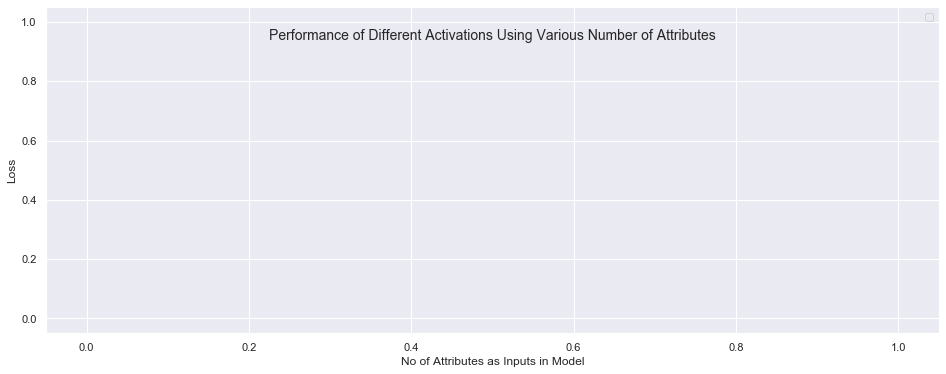

In [25]:
# Plot the actvations to see which performed best
plt.rcParams["figure.figsize"] = [16, 6]
groups = df.groupby(["activation"])

# Plot
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for activation, group in groups:
    ax.plot(group["no_attrib"], group["loss"], ".", ms=12, label=activation)
ax.legend()
ax.set_ylabel("Loss")
ax.set_xlabel("No of Attributes as Inputs in Model")
ax.text(.5,.9,"Performance of Different Activations Using Various Number of Attributes", horizontalalignment='center',transform=ax.transAxes,fontsize=14)

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Performance of Different Optimiser Using Various Number of Attributes')

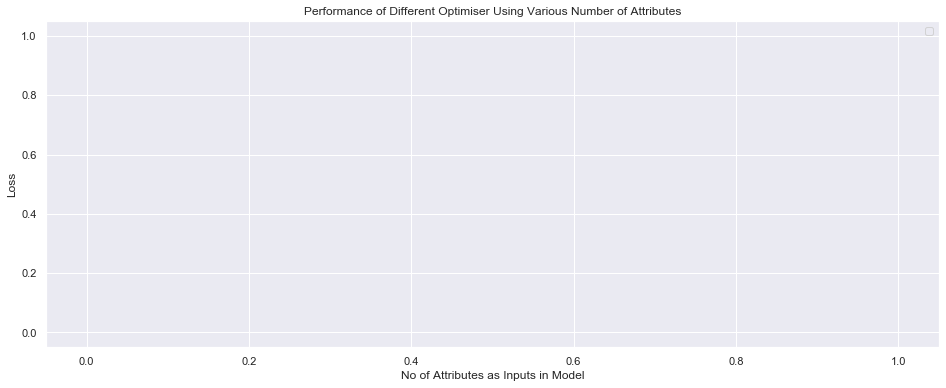

In [26]:
# Plot the actvations to see which performed best
plt.rcParams["figure.figsize"] = [16, 6]
groups = df.groupby('optimiser')

# Plot
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for optimiser, group in groups:
    ax.plot(group["no_attrib"], group["loss"], ".", ms=12, label=optimiser)
ax.legend()
ax.set_ylabel("Loss")
ax.set_xlabel("No of Attributes as Inputs in Model")
plt.title("Performance of Different Optimiser Using Various Number of Attributes")

In [27]:
sns.boxplot(x = "activation", y = "loss", hue = "optimiser", data = df)

ValueError: min() arg is an empty sequence

In [ ]:
sns.boxplot(x = "activation", y = "loss", hue = "pre_process", data = df)

In [ ]:
sns.boxplot(x = "no_attrib", y = "loss", hue = "optimiser", data = df)

In [ ]:
sns.boxplot(x = "no_attrib", y = "loss", hue = "activation", data = df)